In [0]:
from pyspark.sql.functions import year, month, avg
import matplotlib.pyplot as plt

storage_account_name = "adls1046project"
container_name = "container"
file_name = "GlobalLandTemperaturesByCountry.csv"
storage_account_access_key = "KUKAhIfCYt/M/1Co79hLgWIsSzICBxQ7TJQ3s7DwtrO1gZWe/lRA0Rh43+Qmu1+PR31WfvqtRx6w+ASthC5Ofg=="
spark.conf.set("fs.azure.account.key." + storage_account_name + ".blob.core.windows.net", storage_account_access_key)
data = spark.read.format("csv").load(f"wasbs://{container_name}@{storage_account_name}.blob.core.windows.net/{file_name}", inferSchema=True, header=True)

In [0]:
# Ensure 'Date' column is of type DateType
data = data.withColumn("Date", data["Date"].cast("date"))
data.show()

+----------+-------------------+-----------------------------+-------+
|      Date| AverageTemperature|AverageTemperatureUncertainty|Country|
+----------+-------------------+-----------------------------+-------+
|1743-11-01| 4.3839999999999995|                        2.294|  Åland|
|1743-12-01|               NULL|                         NULL|  Åland|
|1744-01-01|               NULL|                         NULL|  Åland|
|1744-02-01|               NULL|                         NULL|  Åland|
|1744-03-01|               NULL|                         NULL|  Åland|
|1744-04-01|               1.53|                         4.68|  Åland|
|1744-05-01|  6.702000000000001|                        1.789|  Åland|
|1744-06-01| 11.609000000000002|                        1.577|  Åland|
|1744-07-01|             15.342|                         1.41|  Åland|
|1744-08-01|               NULL|                         NULL|  Åland|
|1744-09-01|             11.702|                        1.517|  Åland|
|1744-

In [0]:
# Extract year and month from the 'Date' column
from pyspark.sql.functions import year
data = data.withColumn("Year", year("Date"))
data.show()

+----------+-------------------+-----------------------------+-------+----+
|      Date| AverageTemperature|AverageTemperatureUncertainty|Country|Year|
+----------+-------------------+-----------------------------+-------+----+
|1743-11-01| 4.3839999999999995|                        2.294|  Åland|1743|
|1743-12-01|               NULL|                         NULL|  Åland|1743|
|1744-01-01|               NULL|                         NULL|  Åland|1744|
|1744-02-01|               NULL|                         NULL|  Åland|1744|
|1744-03-01|               NULL|                         NULL|  Åland|1744|
|1744-04-01|               1.53|                         4.68|  Åland|1744|
|1744-05-01|  6.702000000000001|                        1.789|  Åland|1744|
|1744-06-01| 11.609000000000002|                        1.577|  Åland|1744|
|1744-07-01|             15.342|                         1.41|  Åland|1744|
|1744-08-01|               NULL|                         NULL|  Åland|1744|
|1744-09-01|

In [0]:
data = data.withColumn("Month", month("Date"))
data.show()

+----------+------------------+-----------------------------+-------+----+-----+
|      Date|AverageTemperature|AverageTemperatureUncertainty|Country|Year|Month|
+----------+------------------+-----------------------------+-------+----+-----+
|1743-11-01|             4.384|                        2.294|  Åland|1743|   11|
|1743-12-01|              null|                         null|  Åland|1743|   12|
|1744-01-01|              null|                         null|  Åland|1744|    1|
|1744-02-01|              null|                         null|  Åland|1744|    2|
|1744-03-01|              null|                         null|  Åland|1744|    3|
|1744-04-01|              1.53|                         4.68|  Åland|1744|    4|
|1744-05-01|             6.702|                        1.789|  Åland|1744|    5|
|1744-06-01|            11.609|                        1.577|  Åland|1744|    6|
|1744-07-01|            15.342|                         1.41|  Åland|1744|    7|
|1744-08-01|              nu

In [0]:
# Group by year and month, calculate average temperature
yearly_avg_temp = data.groupBy("Year").agg(avg("AverageTemperature").alias("AvgTemperature"))
yearly_avg_temp.show()

+----+------------------+
|Year|    AvgTemperature|
+----+------------------+
|1829|13.561706676136366|
|1896|18.341112044817915|
|1884| 17.77303816228231|
|1766| 8.620333333333335|
|1787|10.600193333333333|
|1888|17.717159909909917|
|1808| 8.955127688172043|
|1743|           5.18414|
|1863|16.426328928739974|
|1745|1.3871250000000002|
|1823|10.522018099547513|
|1869|         17.021076|
|1892|18.215350988700568|
|1752| 4.413386666666668|
|1772| 9.105813271604939|
|1826|14.497344460227275|
|1816| 9.508635179153096|
|1871|16.143479502533395|
|1889|18.138997806215713|
|1875|17.374701452599393|
+----+------------------+
only showing top 20 rows



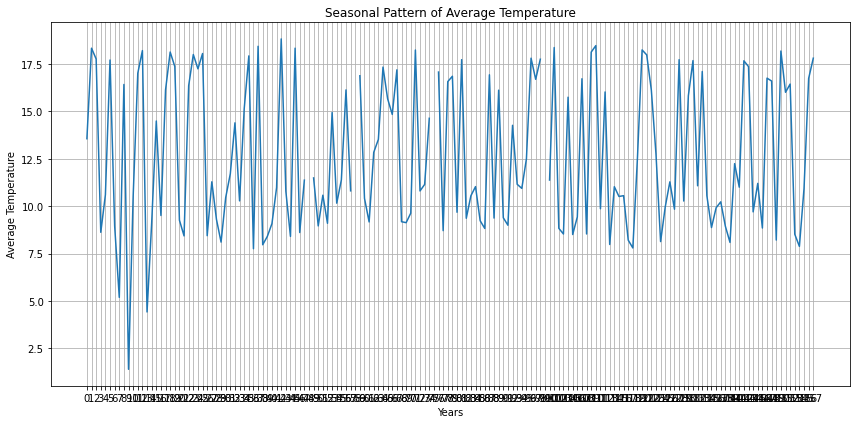

In [0]:
# Convert Spark DataFrame to Pandas DataFrame for visualization
yearly_avg_temp_pandas = yearly_avg_temp.toPandas()

# Plot the seasonal pattern of average temperature
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_temp_pandas["AvgTemperature"])
plt.title("Seasonal Pattern of Average Temperature")
plt.xlabel("Years")
plt.ylabel("Average Temperature")
plt.xticks(range(len(yearly_avg_temp_pandas)))  
plt.grid(True)
plt.tight_layout()
plt.show()